In [26]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
test_data = pd.read_csv('../data/wk3_kc_house_test_data.csv')
train_data = pd.read_csv('../data/wk3_kc_house_train_data.csv')
valid_data = pd.read_csv('../data/wk3_kc_house_valid_data.csv')

In [12]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [43]:
train_data = train_data.sort_values(by = ['sqft_living', 'price'])
reg = linear_model.LinearRegression()
poly_data = polynomial_dataframe(train_data['sqft_living'], 6)
reg.fit(poly_data, train_data['price'])
reg.predict(polynomial_dataframe(train_data['sqft_living'], 6))
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [  8.50062755e-12   3.82310649e-08   3.79412374e-05  -9.89792937e-09
   1.06074532e-12  -3.90873611e-17]


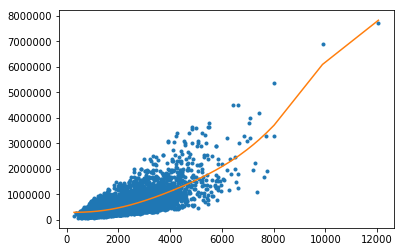

In [44]:
plt.plot(poly_data['power_1'],train_data['price'],'.',
        poly_data['power_1'], reg.predict(poly_data),'-')

In [47]:
residual = test_data['price'] - reg.predict(polynomial_dataframe(test_data['sqft_living'], 6))

In [48]:
RS = residual * residual
RSS = RS.sum()
print(RSS)

1.35225111877e+14
